# Энтропия случайного блуждания по графу

In [1]:
import numpy as np

import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt

### Диагональная матрица

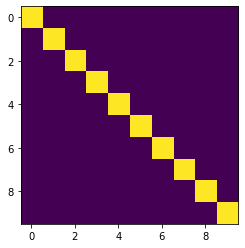

In [167]:
n = 10
s = np.eye(n)
w, v = np.linalg.eig(s.T)
plt.imshow(s);

In [165]:
h = 0.0

for vi in v.T:
    h += -np.sum(vi * np.sum(s * np.log(s + 1e-8), axis=1))
    
h

-9.999999889225291e-08

In [166]:
r = np.ones(n) / n
-np.sum(r * np.sum(s * np.log(s + 1e-8), axis=1))

-9.999999889225291e-09

### Случайная матрица

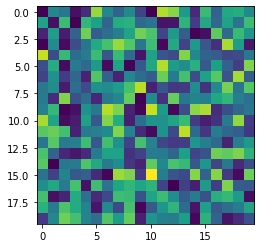

In [153]:
# не нужна нормировка
n = 20
s = np.random.rand(n, n)
s /= np.sum(s, axis=1, keepdims=True)

plt.imshow(s);

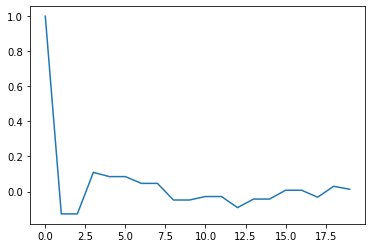

In [154]:
w, v = np.linalg.eig(s.T)
rho = np.real(v[:, 0])
if np.any(rho < 0):
    rho *= -1
assert np.all(rho >= 0)
rho /= np.sum(rho)

plt.plot(np.real(w));

In [155]:
np.dot(rho, s)

array([0.05488634, 0.04950593, 0.04256786, 0.03820543, 0.04637201,
       0.05116305, 0.05312016, 0.0660323 , 0.05725557, 0.03628004,
       0.05613755, 0.05084099, 0.04791155, 0.05444833, 0.03991718,
       0.04652238, 0.05150556, 0.05433283, 0.05205243, 0.05094252])

In [152]:
-np.sum(rho * np.sum(s * np.log(s + 1e-8), axis=1))

2.7862130354613828

In [157]:
r = np.ones(n) / n
-np.sum(r * np.sum(s * np.log(s + 1e-8), axis=1))

2.7990891856592865

### Ненулевые элементы по бернулли

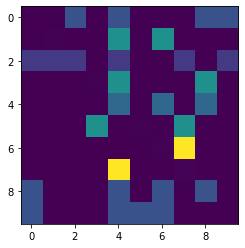

In [158]:
p = 0.25
n = 10
s = np.random.binomial(1, p, size=(n, n))
s = s + np.eye(s.shape[0]) * 0.01
s = s / np.sum(s, axis=1, keepdims=True)

plt.imshow(s);

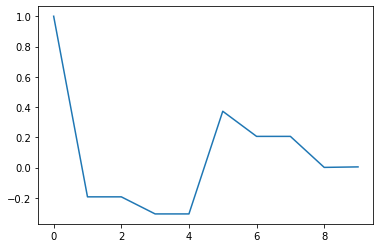

In [159]:
# возникает несколько устойчивых стохастических процессов
w, v = np.linalg.eig(s.T)
i = 0
rho = np.real(v[:, i])
if np.any(rho < 0):
    rho *= -1
assert np.all(rho >= 0)
rho /= np.sum(rho)

plt.plot(np.real(w));

In [160]:
np.dot(rho, s) - rho

array([ 1.38777878e-16,  3.85975973e-17, -1.00613962e-16,  9.10729825e-18,
        1.66533454e-16,  8.67361738e-19, -2.77555756e-17, -2.77555756e-17,
       -1.11022302e-16, -1.38777878e-17])

In [161]:
-np.sum(rho * np.sum(s * np.log(s + 1e-8), axis=1))

0.8087056005696569

In [163]:
r = np.ones(n) / n
-np.sum(r * np.sum(s * np.log(s + 1e-8), axis=1))

0.935141962746388